In [1]:
import bagpy
from typing import *
from os.path import join, exists
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_results_from_folder(folder: str) -> Dict[str, Tuple[List[float], List[float]]]:
    utn_path = join(folder, "UTN")
    maryland_path = join(folder, "MARYLAND")
    if not exists(utn_path) or not exists(maryland_path):
        print(f"Skipping {folder} because of not having both maryland and UTN")
        return None
    utn_bag_file = glob(join(utn_path, "*.bag"))[0]
    maryland_bag_file = glob(join(maryland_path, "*.bag"))[0]
    reader_utn = bagpy.bagreader(utn_bag_file)
    reader_maryland = bagpy.bagreader(maryland_bag_file)
    
    def get_explored_df(reader: bagpy.bagreader) -> pd.DataFrame:
        explored_data =  reader.reader.read_messages("/create1/explored")
        amt_of_non_unknown = []
        timestamps = []
        for d in explored_data:
            amt_of_non_unknown.append(d.message.data)
            timestamps.append(d.timestamp.to_sec())
        amt_of_non_unknown = [0.0025 * item for item in amt_of_non_unknown]
        dic = {"timestamp": timestamps, "m_2_explored": amt_of_non_unknown}
        df = pd.DataFrame(dic)
        df["timestamp"] -= dic["timestamp"][0]
        df = df.set_index("timestamp")
        return df
    
    def get_travelled_distance_df(reader: bagpy.bagreader) -> pd.DataFrame:
        travelled_data =  reader.reader.read_messages("/create1/travelled_distance")
        cum_distance = []
        timestamps = []
        for d in travelled_data:
            cum_distance.append(d.message.data)
            timestamps.append(d.timestamp.to_sec())
        dic = {"timestamp": timestamps, "cum_distance": cum_distance}
        df = pd.DataFrame(dic)
        df["timestamp"] -= dic["timestamp"][0]
        df = df.set_index("timestamp")
        return df
    def get_trajectory_df(reader: bagpy.bagreader) -> pd.DataFrame:
        gts =  reader.reader.read_messages("/create1/gts")
        xs = []
        ys = []
        timestamps = []
        for d in gts:
            xs.append(d.message.pose.pose.position.x)
            ys.append(d.message.pose.pose.position.y)
            timestamps.append(d.timestamp.to_sec())
        dic = {"timestamp": timestamps, "x": xs, "y": ys}
        df = pd.DataFrame(dic)
        df["timestamp"] -= dic["timestamp"][0]
        df = df.set_index("timestamp")
        return df
    def get_times_and_explores(reader: bagpy.bagreader) -> Tuple[List[float], List[float]]:
        explored_df = get_explored_df(reader)
        travelled_distance_df = get_travelled_distance_df(reader)
        trajectory_df = get_trajectory_df(reader)
        return (explored_df, travelled_distance_df, trajectory_df)
    res = {"UTN": get_times_and_explores(reader_utn), "MARYLAND": get_times_and_explores(reader_maryland)}
    return res

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/UTN/2022-10-14-04-04-47.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/MARYLAND/2022-10-14-04-02-03.bag.ac already exists. Not creating.


In [3]:
def plot_result(res: Dict):
    utn_df=  pd.merge_asof(res["UTN"][0], res["UTN"][1], on="timestamp")
    maryland_df=  pd.merge_asof(res["MARYLAND"][0], res["MARYLAND"][1], on="timestamp")
    utn_df = utn_df.dropna()
    maryland_df = maryland_df.dropna()
    
    # utn_traj_df = res["UTN"][2]
    
    plt.plot( utn_df["timestamp"], utn_df["m_2_explored"], label="UTN")
    plt.plot( maryland_df["timestamp"], maryland_df["m_2_explored"], label="MARYLAND")
    # plt.plot(utn_traj_df.x, utn_traj_df.y)
    plt.ylabel("Explored area [m2]")
    plt.xlabel("Distance travelled [m]")
    
    plt.legend()
     

In [4]:
BASE_DIR = "/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs"

In [7]:
res = get_results_from_folder(BASE_DIR + "/evaluation_5")

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_5/UTN/exploration_data_2022-10-26-12-47-03 already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_5/MARYLAND/exploration_data_2022-10-26-12-47-03 already exists. Not creating.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_12/UTN/exploration_data_2022-10-18-13-41-27 already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_12/MARYLAND/exploration_data_2022-10-18-13-41-27 already exists. Not creating.


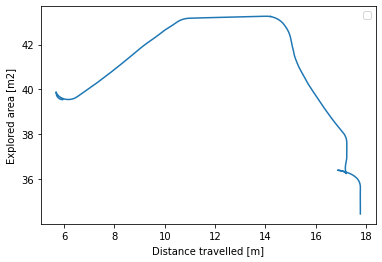

In [98]:
res_7 = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/evaluation_12")


In [13]:
res_7 = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7")

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/UTN/2022-10-14-04-04-47.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_7/MARYLAND/2022-10-14-04-02-03.bag.ac already exists. Not creating.


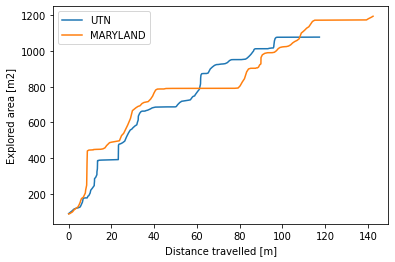

In [39]:
plot_result(res_9)

In [35]:
plt.plot(*worlds_df.loc["evaluation_9"].world.free_space_polygon.unary_union.exterior.xy)

AttributeError: 'MultiPolygon' object has no attribute 'unary_union'

In [24]:
print(f"Area total: {worlds_df.loc['test_9'].free_area}")

Area total: 1593.9369583629668


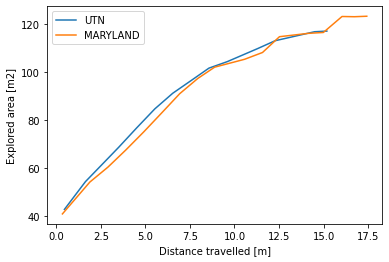

In [14]:
plot_result(res_7)

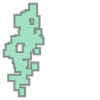

In [90]:
worlds_df.loc["evaluation_19"].world.

In [94]:
worlds_df

,world,world_dir,starting_point,free_area
evaluation_4,<FrontierExploration.preprocessing.layout.synt...,/home/ramiro/.gazeboworlds/evaluation_4.world,"(15.87691595950028, 50.51699863460009)",1421.720337
evaluation_2,<FrontierExploration.preprocessing.layout.synt...,/home/ramiro/.gazeboworlds/evaluation_2.world,"(21.46529087191146, 28.058303657236713)",731.884611


In [101]:
worlds_df = pd.read_pickle("/home/ramiro/.gazebo/worlds_df.pkl")

Exception ignored in: <function _CollectionManager.__del__ at 0x7f2ec05c09d0>
Traceback (most recent call last):
  File "/home/ramiro/.local/lib/python3.8/site-packages/pcg_gazebo/collection_managers/_collection_manager.py", line 25, in __del__
    self._collection.clear()
AttributeError: 'MeshManager' object has no attribute '_collection'
Exception ignored in: <function _CollectionManager.__del__ at 0x7f2ec05c09d0>
Traceback (most recent call last):
  File "/home/ramiro/.local/lib/python3.8/site-packages/pcg_gazebo/collection_managers/_collection_manager.py", line 25, in __del__
    self._collection.clear()
AttributeError: 'AssetsManager' object has no attribute '_collection'


EOFError: Ran out of input

In [74]:
free_space = worlds_df.loc["evaluation_10"].world.free_space_polygon

In [52]:
type(Polygon(*wall.interiors[0].boundary))

/tmp/ipykernel_13663/3532106064.py:1: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  type(Polygon(*wall.interiors[0].boundary))
/tmp/ipykernel_13663/3532106064.py:1: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  type(Polygon(*wall.interiors[0].boundary))


shapely.geometry.polygon.Polygon

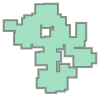

In [70]:
wall

In [75]:
free_space = free_space.intersection(wall)

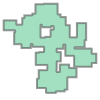

In [76]:
free_space

In [43]:
from shapely.geometry import MultiPolygon, Polygon

In [27]:
print(f"Area total: {worlds_df.loc['test_7'].free_area}")

Area total: 1588.816181110351


/tmp/ipykernel_10854/3673166186.py:3: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  plt.plot([p.exterior.xy for p in worlds_df.loc["evaluation_9"].world.free_space_polygon])
/home/ramiro/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

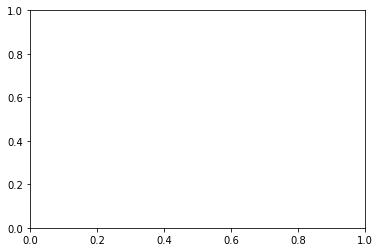

In [39]:
# plt.plot(*worlds_df.loc["test_1"].world.free_space_polygon.exterior[.xy)

